In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
# tf.random.set_seed(123)
# np.random.seed(123)
from sklearn import metrics
import json 
import os

def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    mse = metrics.mean_squared_error(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print(f'MSE is : {mse}')
    print(f'MAE is : {mae}')
    print(f'RMSE is : {rmse}')
    print(f'MAPE is : {mape}')
    print(f'R2 is : {r2}',end='\n\n')
    return {'mse' : mse, 'mae' : mae, 'rmse' : rmse, 'mape' : mape, 'r2' : r2}

# df = pd.read_csv(r'..\Data\Panama Electricity\continuous_dataset_preprocessing.csv', parse_dates= True)
df = pd.read_csv(
    "../Data/Panama Electricity/continuous_dataset_preprocessing.csv",
    parse_dates=True,
)
df["datetime"] = df["datetime"].apply(pd.to_datetime)

column_names = df.columns.tolist()
train_column_names = df.columns.tolist()
column_names.remove('datetime')
train_column_names.remove('datetime')
train_column_names.remove('nat_demand')

In [3]:
tf.keras.backend.clear_session()
# day_to_test = '1/1/2019'
for month in [*range(1, 12)]:
    day = f'1/{month}/2019'
    valid = df[df['datetime'] <= '1/1/2019 23:00']
    valid = valid[valid['datetime'] > '1/1/2018 23:00']
    train = df[df['datetime'] <= '1/1/2018 23:00']
    test = df[df['datetime'] > day + ' 23:00']
    datatest = df[df['datetime'] <= day + ' 23:00']
    version = 1
    hist_window = 42 # 12, 18, 24, 30, 36, 42, 48, 54, 60
    horizon = 24 # 12, 18, 24, 30, 36
    folder_save = f'../Results/GRU/history_{hist_window}_future_{horizon}_version_{version}'

    model_path = f'{folder_save}/model.h5' 

    x_scaler = preprocessing.MinMaxScaler()
    y_scaler = preprocessing.MinMaxScaler()
    validX = x_scaler.fit_transform(valid[column_names])
    validY = y_scaler.fit_transform(valid[['nat_demand']])

    Trained_model = tf.keras.models.load_model(model_path)
    folder_save = f'../Results/GRU/{month}'
    isExist = os.path.exists(folder_save)
    if not isExist:
       # Create a new directory because it does not exist
       os.makedirs(folder_save)
       print("The new directory is created!")

    data_test = x_scaler.fit_transform(datatest[column_names].tail(hist_window))
    test_rescaled = data_test.reshape(1, data_test.shape[0], data_test.shape[1])

    Predicted_results = Trained_model.predict(test_rescaled)
    Predicted_results_Inv_trans = y_scaler.inverse_transform(Predicted_results)
    metrics_test = timeseries_evaluation_metrics_func(test['nat_demand'][:horizon],Predicted_results_Inv_trans[0])
    with open(f"{folder_save}/metrics_test.json", "w") as outfile:
        json.dump(metrics_test, outfile)

The new directory is created!
1/1 [==============================] - 1s 889ms/step
Evaluation metric results:-
MSE is : 3650.2973486872593
MAE is : 52.13602635091146
RMSE is : 60.4176906931013
MAPE is : 4.635879672183831
R2 is : 0.9111442117401747

The new directory is created!
1/1 [==============================] - 1s 867ms/step
Evaluation metric results:-
MSE is : 5995.583593784115
MAE is : 59.801669230143226
RMSE is : 77.43115389676248
MAPE is : 5.062179127914524
R2 is : 0.8344138422633229

The new directory is created!
1/1 [==============================] - 1s 927ms/step
Evaluation metric results:-
MSE is : 13711.847599011475
MAE is : 92.39930034993489
RMSE is : 117.09759860480263
MAPE is : 7.836099703865878
R2 is : 0.6261160396461398

The new directory is created!
1/1 [==============================] - 1s 1s/step
Evaluation metric results:-
MSE is : 22193.224427853667
MAE is : 110.65345134277341
RMSE is : 148.97390519098863
MAPE is : 9.840035350590192
R2 is : -0.3703597295573462



In [6]:
tf.keras.backend.clear_session()
# day_to_test = '1/1/2019'
for month in [*range(1, 2)]:
    day = f'1/{month}/2019'
    valid = df[df['datetime'] <= '1/1/2019 23:00']
    valid = valid[valid['datetime'] > '1/1/2018 23:00']
    train = df[df['datetime'] <= '1/1/2018 23:00']
    test = df[df['datetime'] > day + ' 23:00']
    datatest = df[df['datetime'] <= day + ' 23:00']
    version = 1
    hist_window = 42 # 12, 18, 24, 30, 36, 42, 48, 54, 60
    horizon = 24 # 12, 18, 24, 30, 36
    folder_save = f'../Results/GRU/history_{hist_window}_future_{horizon}_version_{version}'

    model_path = f'{folder_save}/model.h5' 

    x_scaler = preprocessing.MinMaxScaler()
    y_scaler = preprocessing.MinMaxScaler()
    validX = x_scaler.fit_transform(valid[column_names])
    validY = y_scaler.fit_transform(valid[['nat_demand']])

    Trained_model = tf.keras.models.load_model(model_path)
    folder_save = f'../Results/GRU/{month}'
    isExist = os.path.exists(folder_save)
    if not isExist:
       # Create a new directory because it does not exist
       os.makedirs(folder_save)
       print("The new directory is created!")

    data_test = x_scaler.fit_transform(datatest[column_names].tail(hist_window))
    test_rescaled = data_test.reshape(1, data_test.shape[0], data_test.shape[1])

    Predicted_results = Trained_model.predict(test_rescaled)
    Predicted_results_Inv_trans = y_scaler.inverse_transform(Predicted_results)
    metrics_test = timeseries_evaluation_metrics_func(test['nat_demand'][:6],Predicted_results_Inv_trans[0][:6])
    timeseries_evaluation_metrics_func(test['nat_demand'][:12],Predicted_results_Inv_trans[0][:12])
    timeseries_evaluation_metrics_func(test['nat_demand'][:18],Predicted_results_Inv_trans[0][:18])

1/1 [==============================] - 1s 1s/step
Evaluation metric results:-
MSE is : 7064.3802761701345
MAE is : 83.40139905598959
RMSE is : 84.0498677938885
MAPE is : 8.654623571219618
R2 is : -9.477548493320922

Evaluation metric results:-
MSE is : 5291.103601128863
MAE is : 65.23160709635415
RMSE is : 72.73997251256604
MAPE is : 6.452606288928371
R2 is : 0.8610136908425365

Evaluation metric results:-
MSE is : 4413.805720814823
MAE is : 59.070412044270824
RMSE is : 66.436478841182
MAPE is : 5.367930125825003
R2 is : 0.9164164302100526



In [54]:
tf.keras.backend.clear_session()
# day_to_test = '1/1/2019'
for month in [*range(1, 2)]:
    day = f'1/{month}/2019'
    valid = df[df['datetime'] <= '1/1/2019 23:00']
    valid = valid[valid['datetime'] > '1/1/2018 23:00']
    train = df[df['datetime'] <= '1/1/2018 23:00']
    test = df[df['datetime'] > day + ' 23:00']
    datatest = df[df['datetime'] <= day + ' 23:00']
    version = 1
    hist_window = 42 # 12, 18, 24, 30, 36, 42, 48, 54, 60
    horizon = 24 # 12, 18, 24, 30, 36
    folder_save = f'../Results/GRU/history_{hist_window}_future_{horizon}_version_{version}'

    model_path = f'{folder_save}/model.h5' 

    x_scaler = preprocessing.MinMaxScaler()
    y_scaler = preprocessing.MinMaxScaler()
    validX = x_scaler.fit_transform(valid[column_names])
    validY = y_scaler.fit_transform(valid[['nat_demand']])

    Trained_model = tf.keras.models.load_model(model_path)
    folder_save = f'../Results/GRU/{month}'
    isExist = os.path.exists(folder_save)
    if not isExist:
       # Create a new directory because it does not exist
       os.makedirs(folder_save)
       print("The new directory is created!")

    data_test = x_scaler.fit_transform(datatest[column_names].tail(hist_window))
    test_rescaled = data_test.reshape(1, data_test.shape[0], data_test.shape[1])

    Predicted_results = Trained_model.predict(test_rescaled)
    Predicted_results_Inv_trans = y_scaler.inverse_transform(Predicted_results)
    metrics_test = timeseries_evaluation_metrics_func(test['nat_demand'][:6],Predicted_results_Inv_trans[0][:6])
    timeseries_evaluation_metrics_func(test['nat_demand'][:12],Predicted_results_Inv_trans[0][:12])
    timeseries_evaluation_metrics_func(test['nat_demand'][:18],Predicted_results_Inv_trans[0][:18])

1/1 [==============================] - 1s 931ms/step
Evaluation metric results:-
MSE is : 7064.3802761701345
MAE is : 83.40139905598959
RMSE is : 84.0498677938885
MAPE is : 8.654623571219618
R2 is : -9.477548493320922

Evaluation metric results:-
MSE is : 5291.103601128863
MAE is : 65.23160709635415
RMSE is : 72.73997251256604
MAPE is : 6.452606288928371
R2 is : 0.8610136908425365

Evaluation metric results:-
MSE is : 4413.805720814823
MAE is : 59.070412044270824
RMSE is : 66.436478841182
MAPE is : 5.367930125825003
R2 is : 0.9164164302100526



In [58]:
tf.keras.backend.clear_session()
# day_to_test = '1/1/2019'
for month in [*range(1, 2)]:
    day = f'1/{month}/2019'
    valid = df[df['datetime'] <= '1/1/2019 23:00']
    valid = valid[valid['datetime'] > '1/1/2018 23:00']
    train = df[df['datetime'] <= '1/1/2018 23:00']
    test = df[df['datetime'] > day + ' 23:00']
    datatest = df[df['datetime'] <= day + ' 23:00']
    version = 1
    hist_window = 42 # 12, 18, 24, 30, 36, 42, 48, 54, 60
    horizon = 60 # 12, 18, 24, 30, 36
    folder_save = f'../Results/GRU/history_{hist_window}_future_{horizon}_version_{version}'

    model_path = f'{folder_save}/model.h5' 

    x_scaler = preprocessing.MinMaxScaler()
    y_scaler = preprocessing.MinMaxScaler()
    validX = x_scaler.fit_transform(valid[column_names])
    validY = y_scaler.fit_transform(valid[['nat_demand']])

    Trained_model = tf.keras.models.load_model(model_path)
    folder_save = f'../Results/GRU/{month}'
    isExist = os.path.exists(folder_save)
    if not isExist:
       # Create a new directory because it does not exist
       os.makedirs(folder_save)
       print("The new directory is created!")

    data_test = x_scaler.fit_transform(datatest[column_names].tail(hist_window))
    test_rescaled = data_test.reshape(1, data_test.shape[0], data_test.shape[1])

    Predicted_results = Trained_model.predict(test_rescaled)
    Predicted_results_Inv_trans = y_scaler.inverse_transform(Predicted_results)
    gru = Predicted_results_Inv_trans[0]
    

1/1 [==============================] - 1s 905ms/step


In [59]:
tf.keras.backend.clear_session()
# day_to_test = '1/1/2019'
for month in [*range(1, 2)]:
    day = f'1/{month}/2019'
    valid = df[df['datetime'] <= '1/1/2019 23:00']
    valid = valid[valid['datetime'] > '1/1/2018 23:00']
    train = df[df['datetime'] <= '1/1/2018 23:00']
    test = df[df['datetime'] > day + ' 23:00']
    datatest = df[df['datetime'] <= day + ' 23:00']
    version = 1
    hist_window = 30 # 12, 18, 24, 30, 36, 42, 48, 54, 60
    horizon = 60 # 12, 18, 24, 30, 36    
    folder_save = f'../Results/Attention_LSTM/history_{hist_window}_future_{horizon}_version_{version}'

    model_path = f'{folder_save}/model.h5' 

    x_scaler = preprocessing.MinMaxScaler()
    y_scaler = preprocessing.MinMaxScaler()
    validX = x_scaler.fit_transform(valid[column_names])
    validY = y_scaler.fit_transform(valid[['nat_demand']])

    Trained_model = tf.keras.models.load_model(model_path)
    folder_save = f'../Results/Attention_LSTM/{month}'
    isExist = os.path.exists(folder_save)
    if not isExist:
       # Create a new directory because it does not exist
       os.makedirs(folder_save)
       print("The new directory is created!")

    data_test = x_scaler.fit_transform(datatest[column_names].tail(hist_window))
    test_rescaled = data_test.reshape(1, data_test.shape[0], data_test.shape[1])

    Predicted_results = Trained_model.predict(test_rescaled)
    Predicted_results_Inv_trans = y_scaler.inverse_transform(Predicted_results)
    attention = Predicted_results_Inv_trans[0]

1/1 [==============================] - 1s 981ms/step


In [55]:
true = np.array(test['nat_demand'][:24])
gru = Predicted_results_Inv_trans[0]
var = pd.read_csv('../Results/VAR/res_100.csv')['nat_demand_1st_inv_diff'].values[:24]

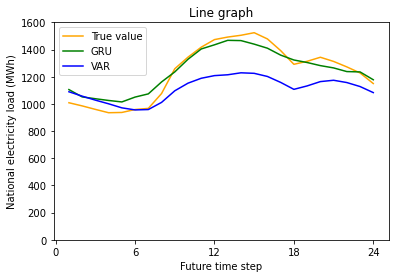

In [56]:
x = np.arange(1, 25)
 
# plotting
plt.title("Line graph")
plt.xlabel("Future time step")
plt.ylabel("National electricity load (MWh)")
plt.ylim([0, 1600])
plt.xticks([*range(0, 25, 6)])
plt.plot(x, true, color ="orange", label = 'True value')
plt.plot(x, gru, color ="green", label = 'GRU')
plt.plot(x, var, color = "blue", label = 'VAR')
plt.legend()
folder_save = f'..\Pics\Deep_Learning'
plt.savefig(f'{folder_save}\Predict_vs_Actual_24.pdf', bbox_inches='tight')
plt.savefig(f'{folder_save}\Predict_vs_Actual_24.svg', bbox_inches='tight')
plt.show()

In [35]:
pd.read_csv('../Results/VAR/res_100.csv')['nat_demand_1st_inv_diff'].values[:24]

array([1089.33193739, 1057.07071362, 1027.64378121, 1000.7132204 ,
        970.99600133,  955.75924609,  958.43428321, 1011.09833603,
       1096.40466064, 1152.59543221, 1188.67359223, 1208.09697907,
       1214.29527517, 1228.80072022, 1224.94207115, 1201.9021743 ,
       1158.19459026, 1107.07463733, 1132.28711216, 1164.0919291 ,
       1173.90791187, 1157.12942383, 1127.76714707, 1083.08675117])

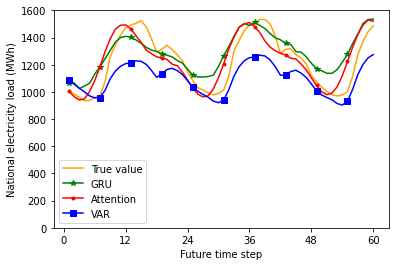

In [76]:
true = np.array(test['nat_demand'][:60])
var = pd.read_csv('../Results/VAR/res_100.csv')['nat_demand_1st_inv_diff'].values[:60]
x = np.arange(1, 61)
 
# plotting
plt.xlabel("Future time step")
plt.ylabel("National electricity load (MWh)")
plt.ylim([0, 1600])
plt.xticks([*range(0, 61, 12)])
plt.plot(x, true, color ="orange", label = 'True value')
plt.plot(x, gru, color ="green", label = 'GRU', markevery=[*range(0, 59, 6)], marker = '*')
plt.plot(x, attention, color ="red", label = 'Attention', markevery=[*range(0, 59, 6)], marker = '.')
plt.plot(x, var, color = "blue", label = 'VAR', markevery=[*range(0, 59, 6)], marker = 's')
plt.legend()
folder_save = f'..\Pics\Deep_Learning'
plt.savefig(f'{folder_save}\Predict_vs_Actual_60.pdf', bbox_inches='tight')
plt.savefig(f'{folder_save}\Predict_vs_Actual_60.svg', bbox_inches='tight')
plt.show()


In [70]:
for i in range(0, 61, 12):
    print(i, end = ', ')

0, 12, 24, 36, 48, 60, 